---

_You are currently looking at **version 1.0** of this notebook. To download notebooks and datafiles, as well as get help on Jupyter notebooks in the Coursera platform, visit the [Jupyter Notebook FAQ](https://www.coursera.org/learn/python-social-network-analysis/resources/yPcBs) course resource._

---

# Assignment 4

In [1]:
import networkx as nx
import pandas as pd
import numpy as np
import pickle

---

## Part 1 - Random Graph Identification

For the first part of this assignment you will analyze randomly generated graphs and determine which algorithm created them.

In [2]:
P1_Graphs = pickle.load(open('A4_graphs','rb'))
#P1_Graphs

<IPython.core.display.Javascript object>


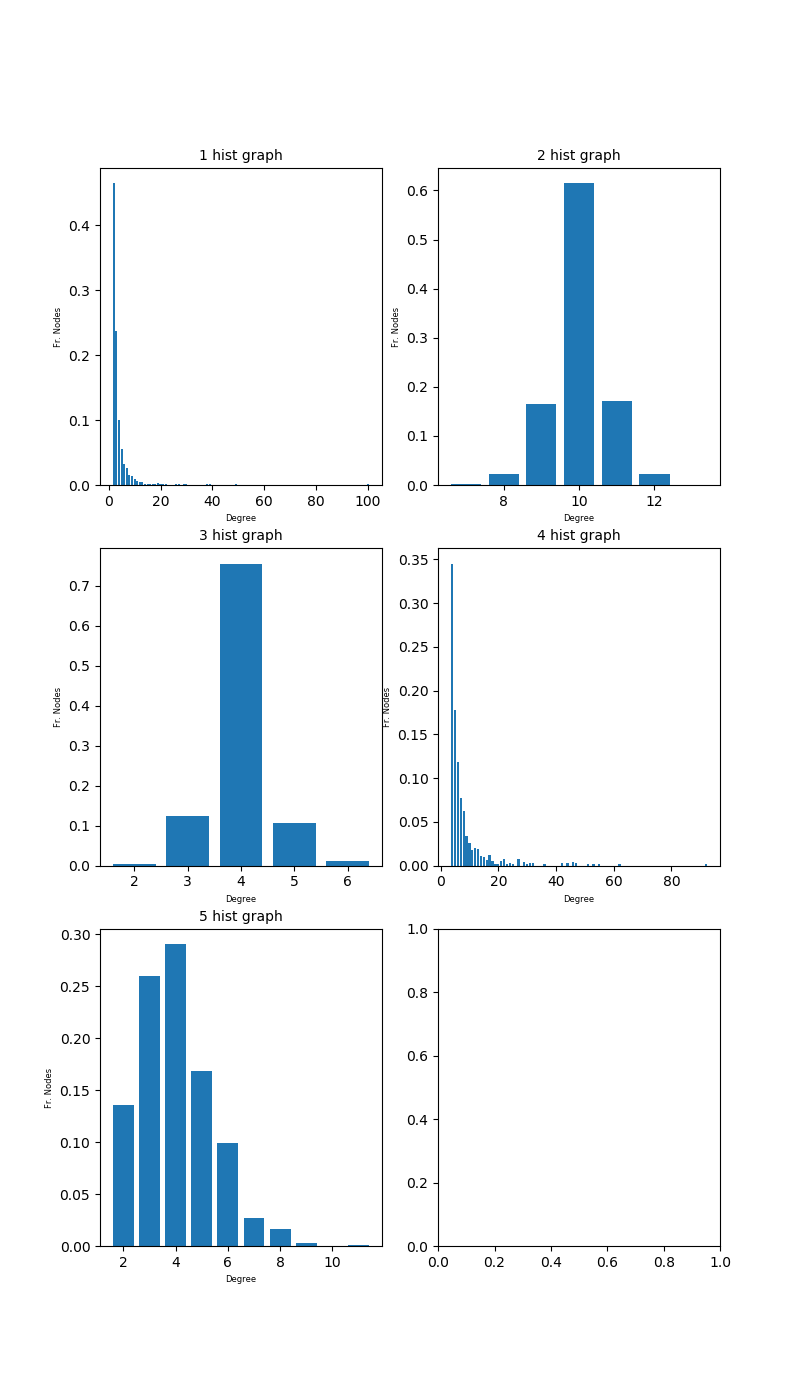

In [3]:
#%matplotlib notebook
#import matplotlib.pyplot as plt

#fig, ((cx11, cx12), (cx21, cx22), (cx31, cx32)) = plt.subplots(3, 2, figsize=(8,14))
#cx = [cx11, cx12, cx21, cx22, cx31]
#for i in range(5):
#    G = P1_Graphs[i]
#    degrees = G.degree()
#    degree_values = sorted(set(degrees.values()))
#    histogram = [list(degrees.values()).count(i)/float(nx.number_of_nodes(G)) for i in degree_values]
    
#    cx[i].bar(degree_values,histogram)
#    cx[i].set_xlabel('Degree', fontsize=6)
#    cx[i].set_ylabel('Fr. Nodes', fontsize=6)
#    cx[i].set_title('{} hist graph'.format(i+1), fontsize=10)
#    plt.show()

In [4]:
measures = {}
index = 0
for g in P1_Graphs:
    measures['g{}'.format(index)] = {
        'nodes_number': nx.number_of_nodes(g),
        'avg_cc': nx.average_clustering(g),
        'short_path': nx.average_shortest_path_length(g),
        'degree_hist"len': len([degree for degree in nx.degree_histogram(g) if degree > 0])} 
    index += 1
#measures

{'g0': {'nodes_number': 1000,
  'avg_cc': 0.03167539146454044,
  'short_path': 4.099161161161161,
  'degree_hist"len': 29},
 'g1': {'nodes_number': 1000,
  'avg_cc': 0.5642419635919628,
  'short_path': 5.089871871871872,
  'degree_hist"len': 7},
 'g2': {'nodes_number': 750,
  'avg_cc': 0.4018222222222227,
  'short_path': 9.378702269692925,
  'degree_hist"len': 5},
 'g3': {'nodes_number': 750,
  'avg_cc': 0.03780379975223251,
  'short_path': 3.1048046283934134,
  'degree_hist"len': 37},
 'g4': {'nodes_number': 750,
  'avg_cc': 0.0033037037037037037,
  'short_path': 5.0785509568313305,
  'degree_hist"len': 9}}

<br>
`P1_Graphs` is a list containing 5 networkx graphs. Each of these graphs were generated by one of three possible algorithms:
* Preferential Attachment (`'PA'`)
* Small World with low probability of rewiring (`'SW_L'`)
* Small World with high probability of rewiring (`'SW_H'`)

Anaylze each of the 5 graphs and determine which of the three algorithms generated the graph.

*The `graph_identification` function should return a list of length 5 where each element in the list is either `'PA'`, `'SW_L'`, or `'SW_H'`.*

In [5]:
def graph_identification():
    model = []
    for g in P1_Graphs:
        nodes_number = nx.number_of_nodes(g)
        avg_cc = nx.average_clustering(g)
        short_path = nx.average_shortest_path_length(g)
        degree_hist_len = len([degree for degree in nx.degree_histogram(g) if degree > 0])       
        if degree_hist_len >15:
            model.append('PA')
        elif avg_cc < 0.1:
            model.append('SW_H')
        else:
            model.append('SW_L')
    return model
#graph_identification()

['PA', 'SW_L', 'SW_L', 'PA', 'SW_H']

In [6]:
#for g in P1_Graphs:
#    print(nx.info(g))
#    print('---------')

Name: barabasi_albert_graph(1000,2)
Type: Graph
Number of nodes: 1000
Number of edges: 1996
Average degree:   3.9920
---------
Name: watts_strogatz_graph(1000,10,0.05)
Type: Graph
Number of nodes: 1000
Number of edges: 5000
Average degree:  10.0000
---------
Name: watts_strogatz_graph(750,5,0.075)
Type: Graph
Number of nodes: 750
Number of edges: 1500
Average degree:   4.0000
---------
Name: barabasi_albert_graph(750,4)
Type: Graph
Number of nodes: 750
Number of edges: 2984
Average degree:   7.9573
---------
Name: watts_strogatz_graph(750,4,1)
Type: Graph
Number of nodes: 750
Number of edges: 1500
Average degree:   4.0000
---------


---

## Part 2 - Company Emails

For the second part of this assignment you will be workking with a company's email network where each node corresponds to a person at the company, and each edge indicates that at least one email has been sent between two people.

The network also contains the node attributes `Department` and `ManagmentSalary`.

`Department` indicates the department in the company which the person belongs to, and `ManagmentSalary` indicates whether that person is receiving a managment position salary.

In [7]:
G = nx.read_gpickle('email_prediction.txt')
print(nx.info(G))

Name: 
Type: Graph
Number of nodes: 1005
Number of edges: 16706
Average degree:  33.2458


### Part 2A - Salary Prediction

Using network `G`, identify the people in the network with missing values for the node attribute `ManagementSalary` and predict whether or not these individuals are receiving a managment position salary.

To accomplish this, you will need to create a matrix of node features using networkx, train a sklearn classifier on nodes that have `ManagementSalary` data, and predict a probability of the node receiving a managment salary for nodes where `ManagementSalary` is missing.



Your predictions will need to be given as the probability that the corresponding employee is receiving a managment position salary.

The evaluation metric for this assignment is the Area Under the ROC Curve (AUC).

Your grade will be based on the AUC score computed for your classifier. A model which with an AUC of 0.75 or higher will receive full points.

Using your trained classifier, return a series of length 252 with the data being the probability of receiving managment salary, and the index being the node id.

    Example:
    
        1       1.0
        2       0.0
        5       0.8
        8       1.0
            ...
        996     0.7
        1000    0.5
        1001    0.0
        Length: 252, dtype: float64

In [8]:
# Initialize the dataframe, using the nodes as the index
df = pd.DataFrame(index=G.nodes())
df['Department'] = pd.Series(nx.get_node_attributes(G, 'Department'))
df['Salary'] = pd.Series(nx.get_node_attributes(G, 'ManagementSalary'))

#embeded network measures
df['cluster'] = pd.Series(nx.clustering(G))
df['degree'] = pd.Series(G.degree())
df['degree_cen'] = pd.Series(nx.degree_centrality(G))
df['closeness'] = pd.Series(nx.closeness_centrality(G, normalized=True))
df['betweenness'] = pd.Series(nx.betweenness_centrality(G, normalized=True))
df['pr'] = pd.Series(nx.pagerank(G))

#dummy variables
dummy = pd.get_dummies(df['Department'], prefix='dptmt', drop_first=True)
df = pd.merge(df, dummy, left_index=True, right_index=True)

#select train and test data, X and y
ycol = ['Salary']
xcol = ['cluster','degree','degree_cen','closeness','betweenness','pr']+list(dummy.columns)
train = df[df.Salary.notnull()]
test = df[df.Salary.isnull()]
X_train = train[xcol]
y_train = np.ravel(train[ycol])
X_test = test[xcol]

In [9]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score

#random forest classification
model = RandomForestClassifier(n_jobs=2, random_state=0)
grid_values = {'n_estimators':[5,6,7,8,9], 'max_depth':[4,5,6,7,8], 'max_features':[6,7,8,9,10]}
grid_model = GridSearchCV(model, param_grid=grid_values, scoring="roc_auc")
grid_model.fit(X_train, y_train)
print('Grid best parameter: ', grid_model.best_params_)
train_pred = grid_model.predict(X_train)
print('roc auc score: ', roc_auc_score(y_train, train_pred))
test_pred = grid_model.predict_proba(X_test)
ans = pd.Series([x[1] for x in test_pred], index = X_test.index)

Grid best parameter:  {'max_depth': 7, 'max_features': 6, 'n_estimators': 5}
roc auc score:  0.8093470826816531


In [51]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score

In [11]:
def salary_predictions():
    # Initialize the dataframe, using the nodes as the index
    df = pd.DataFrame(index=G.nodes())
    df['Department'] = pd.Series(nx.get_node_attributes(G, 'Department'))
    df['Salary'] = pd.Series(nx.get_node_attributes(G, 'ManagementSalary'))
    #embeded network measures
    df['cluster'] = pd.Series(nx.clustering(G))
    df['degree'] = pd.Series(G.degree())
    df['degree_cen'] = pd.Series(nx.degree_centrality(G))
    df['closeness'] = pd.Series(nx.closeness_centrality(G, normalized=True))
    df['betweenness'] = pd.Series(nx.betweenness_centrality(G, normalized=True))
    df['pr'] = pd.Series(nx.pagerank(G))
    #dummy variables
    dummy = pd.get_dummies(df['Department'], prefix='dptmt', drop_first=True)
    df = pd.merge(df, dummy, left_index=True, right_index=True)
    #select train and test data, X and y
    ycol = ['Salary']
    xcol = ['cluster','degree','degree_cen','closeness','betweenness','pr']+list(dummy.columns)
    train = df[df.Salary.notnull()]
    test = df[df.Salary.isnull()]
    X_train = train[xcol]
    y_train = np.ravel(train[ycol])
    X_test = test[xcol]
    #random forest classification
    model = RandomForestClassifier(n_jobs=2,random_state=0,max_depth=7,max_features=6,n_estimators=5)
    model.fit(X_train, y_train)
    test_pred = model.predict_proba(X_test)
    ans = pd.Series([x[1] for x in test_pred], index = X_test.index)
    return ans
#salary_predictions()

1       0.020007
2       1.000000
5       1.000000
8       0.152949
14      0.064656
18      0.040520
27      0.049603
30      0.651767
31      0.384505
34      0.091700
37      0.151700
40      0.095756
45      0.039190
54      0.384505
55      0.237334
60      0.362899
62      1.000000
65      0.804954
77      0.019936
79      0.064656
97      0.013231
101     0.011204
103     0.466821
108     0.044144
113     0.043353
122     0.032416
141     0.431716
142     1.000000
144     0.017627
145     0.466821
          ...   
913     0.009962
914     0.013231
915     0.012619
918     0.091700
923     0.017627
926     0.017627
931     0.017627
934     0.012619
939     0.012619
944     0.012619
945     0.017627
947     0.037627
950     0.064656
951     0.017627
953     0.012619
959     0.012619
962     0.012619
963     0.195221
968     0.037627
969     0.037627
974     0.017627
984     0.012619
987     0.017627
989     0.037627
991     0.037627
992     0.012619
994     0.012619
996     0.0126

### Part 2B - New Connections Prediction

For the last part of this assignment, you will predict future connections between employees of the network. The future connections information has been loaded into the variable `future_connections`. The index is a tuple indicating a pair of nodes that currently do not have a connection, and the `Future Connection` column indicates if an edge between those two nodes will exist in the future, where a value of 1.0 indicates a future connection.

In [64]:
future_connections = pd.read_csv('Future_Connections.csv', index_col=0, converters={0: eval})
print(future_connections['Future Connection'].value_counts(dropna=False))

 0.0    337002
NaN     122112
 1.0     29332
Name: Future Connection, dtype: int64


In [65]:
df = future_connections.copy()
df['Common_Neigh'] = df.index.map(lambda x: len(list(nx.common_neighbors(G, x[0], x[1]))))
df['Jaccard'] = [i[2] for i in nx.jaccard_coefficient(G, df.index)]
df['Res_alloc'] = [i[2] for i in nx.resource_allocation_index(G, df.index)]
df['Adamic_Adar'] = [i[2] for i in nx.adamic_adar_index(G, df.index)]
df['Pref_Attach'] = [i[2] for i in nx.preferential_attachment(G, df.index)]
df.head(5)

,Future Connection,Common_Neigh,Jaccard,Res_alloc,Adamic_Adar,Pref_Attach
"(6, 840)",0.0,9,0.073770,0.136721,2.110314,2070
"(4, 197)",0.0,2,0.015504,0.008437,0.363528,3552
"(620, 979)",0.0,0,0.000000,0.000000,0.000000,28
"(519, 872)",0.0,2,0.060606,0.039726,0.507553,299
"(382, 423)",0.0,0,0.000000,0.000000,0.000000,205


In [47]:
ycol = [(df.columns)[0]]
xcol = list(df.columns)[1:]

train = df[df['Future Connection'].notnull()]
test = df[df['Future Connection'].isnull()]

X_train = train[xcol]
y_train = np.ravel(train[ycol])
X_test = test[xcol]

In [63]:
gbrt = GradientBoostingClassifier(random_state=20)
gbrt.fit(X_train, y_train)
train_pred = gbrt.predict(X_train)
print('score: ',gbrt.score(X_train,y_train))
print('roc auc score: ', roc_auc_score(y_train, train_pred))
test_pred = gbrt.predict_proba(X_test)
ans = pd.Series([x[1] for x in test_pred], index = X_test.index)

score:  0.9602548493997282
roc auc score:  0.7949307503439051


(107, 348)    0.030342
(542, 751)    0.013050
(20, 426)     0.539323
(50, 989)     0.013050
(942, 986)    0.013050
(324, 857)    0.013050
(13, 710)     0.118869
(19, 271)     0.149760
(319, 878)    0.013050
(659, 707)    0.013050
(49, 843)     0.013050
(208, 893)    0.013050
(377, 469)    0.013792
(405, 999)    0.019812
(129, 740)    0.021756
(292, 618)    0.039721
(239, 689)    0.013050
(359, 373)    0.013792
(53, 523)     0.029697
(276, 984)    0.013050
(202, 997)    0.013050
(604, 619)    0.081836
(270, 911)    0.013050
(261, 481)    0.062892
(200, 450)    0.906969
(213, 634)    0.013050
(644, 735)    0.142963
(346, 553)    0.013050
(521, 738)    0.013050
(422, 953)    0.018552
                ...   
(672, 848)    0.013050
(28, 127)     0.963145
(202, 661)    0.013050
(54, 195)     0.997535
(295, 864)    0.013050
(814, 936)    0.013050
(839, 874)    0.013050
(139, 843)    0.013050
(461, 544)    0.013467
(68, 487)     0.013467
(622, 932)    0.013050
(504, 936)    0.016148
(479, 528) 

Using network `G` and `future_connections`, identify the edges in `future_connections` with missing values and predict whether or not these edges will have a future connection.

To accomplish this, you will need to create a matrix of features for the edges found in `future_connections` using networkx, train a sklearn classifier on those edges in `future_connections` that have `Future Connection` data, and predict a probability of the edge being a future connection for those edges in `future_connections` where `Future Connection` is missing.



Your predictions will need to be given as the probability of the corresponding edge being a future connection.

The evaluation metric for this assignment is the Area Under the ROC Curve (AUC).

Your grade will be based on the AUC score computed for your classifier. A model which with an AUC of 0.75 or higher will receive full points.

Using your trained classifier, return a series of length 122112 with the data being the probability of the edge being a future connection, and the index being the edge as represented by a tuple of nodes.

    Example:
    
        (107, 348)    0.35
        (542, 751)    0.40
        (20, 426)     0.55
        (50, 989)     0.35
                  ...
        (939, 940)    0.15
        (555, 905)    0.35
        (75, 101)     0.65
        Length: 122112, dtype: float64

In [66]:
def new_connections_predictions():
    df = future_connections.copy()
    df['Common_Neigh'] = df.index.map(lambda x: len(list(nx.common_neighbors(G, x[0], x[1]))))
    df['Jaccard'] = [i[2] for i in nx.jaccard_coefficient(G, df.index)]
    df['Res_alloc'] = [i[2] for i in nx.resource_allocation_index(G, df.index)]
    df['Adamic_Adar'] = [i[2] for i in nx.adamic_adar_index(G, df.index)]
    df['Pref_Attach'] = [i[2] for i in nx.preferential_attachment(G, df.index)]
    ycol = [(df.columns)[0]]
    xcol = list(df.columns)[1:]
    train = df[df['Future Connection'].notnull()]
    test = df[df['Future Connection'].isnull()]
    X_train = train[xcol]
    y_train = np.ravel(train[ycol])
    X_test = test[xcol]
    gbrt = GradientBoostingClassifier(random_state=20)
    gbrt.fit(X_train, y_train)
    test_pred = gbrt.predict_proba(X_test)
    ans = pd.Series([x[1] for x in test_pred], index = X_test.index)
    return ans
#new_connections_predictions()

(107, 348)    0.030342
(542, 751)    0.013050
(20, 426)     0.539323
(50, 989)     0.013050
(942, 986)    0.013050
(324, 857)    0.013050
(13, 710)     0.118869
(19, 271)     0.149760
(319, 878)    0.013050
(659, 707)    0.013050
(49, 843)     0.013050
(208, 893)    0.013050
(377, 469)    0.013792
(405, 999)    0.019812
(129, 740)    0.021756
(292, 618)    0.039721
(239, 689)    0.013050
(359, 373)    0.013792
(53, 523)     0.029697
(276, 984)    0.013050
(202, 997)    0.013050
(604, 619)    0.081836
(270, 911)    0.013050
(261, 481)    0.062892
(200, 450)    0.906969
(213, 634)    0.013050
(644, 735)    0.142963
(346, 553)    0.013050
(521, 738)    0.013050
(422, 953)    0.018552
                ...   
(672, 848)    0.013050
(28, 127)     0.963145
(202, 661)    0.013050
(54, 195)     0.997535
(295, 864)    0.013050
(814, 936)    0.013050
(839, 874)    0.013050
(139, 843)    0.013050
(461, 544)    0.013467
(68, 487)     0.013467
(622, 932)    0.013050
(504, 936)    0.016148
(479, 528) 